# Final Project - MSCA 31008 Data Mining Principles

**Author**: Devanshi Verma
<br>
**Topic**: Kaggle Challenge: Airbnb New User Bookings
<br>
**Goal**: Where will a new guest book their first travel experience?
<br>
**Link**:https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/overview/description
<br>
**Instructor**: Anil Chaturvedi


**Importing the files and loading the dataset**

In [111]:
#loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
#Importing all the datasets
#Training Set of users
train_users=pd.read_csv('/Users/devanshiverma/Desktop/UChicago/02-Quarter/Data/train_users_2.csv')
#Testing Set of users
test_users=pd.read_csv('/Users/devanshiverma/Desktop/UChicago/02-Quarter/Data/test_users.csv')
#web sessions log for users
sessions=pd.read_csv('/Users/devanshiverma/Desktop/UChicago/02-Quarter/Data/sessions.csv')
#Loading the summary stats of countries
countries=pd.read_csv('/Users/devanshiverma/Desktop/UChicago/02-Quarter/Data/countries.csv')
#Summary stats of user age
age_gender_bkts=pd.read_csv('/Users/devanshiverma/Desktop/UChicago/02-Quarter/Data/age_gender_bkts.csv')
#Sample submission
sample_submission=pd.read_csv('/Users/devanshiverma/Desktop/UChicago/02-Quarter/Data/sample_submission_NDF.csv')

In [113]:
#converting the date values to datetime
train_users['date_account_created'] = pd.to_datetime(train_users['date_account_created'])
train_users['date_first_booking'] = pd.to_datetime(train_users['date_first_booking'])
train_users['timestamp_first_active'] = pd.to_datetime(train_users['timestamp_first_active'], format='%Y%m%d%H%M%S')
test_users['date_first_booking'] = pd.to_datetime(test_users['date_first_booking'])
test_users['date_account_created'] = pd.to_datetime(test_users['date_account_created'])
test_users['timestamp_first_active'] = pd.to_datetime(test_users['timestamp_first_active'], format='%Y%m%d%H%M%S')
train_users.head()
test_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,2014-07-01 00:00:06,NaT,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,2014-07-01 00:00:51,NaT,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,2014-07-01 00:01:48,NaT,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,2014-07-01 00:02:15,NaT,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,2014-07-01 00:03:05,NaT,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [114]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [115]:
countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [116]:
age_gender_bkts.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [117]:
sample_submission.head()

,id,country
0,5uwns89zht,NDF
1,jtl0dijy2j,NDF
2,xx0ulgorjt,NDF
3,6c6puo6ix0,NDF
4,czqhjk3yfe,NDF


# EDA

In [96]:
#Function to get distribution graphs

def get_distr(feature):
    sns.set()
    plt.figure(figsize=(10,8))
    sns.barplot(train_users[feature].value_counts().index,train_users[feature].value_counts(),palette="husl")
    

**Gender**

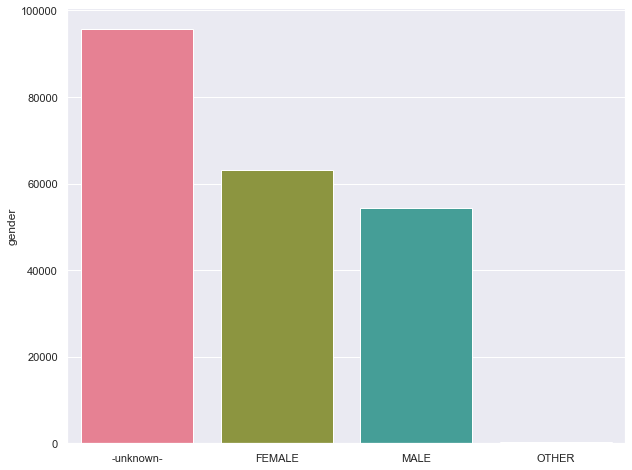

In [40]:
get_distr('gender')

**Desination Distribution**

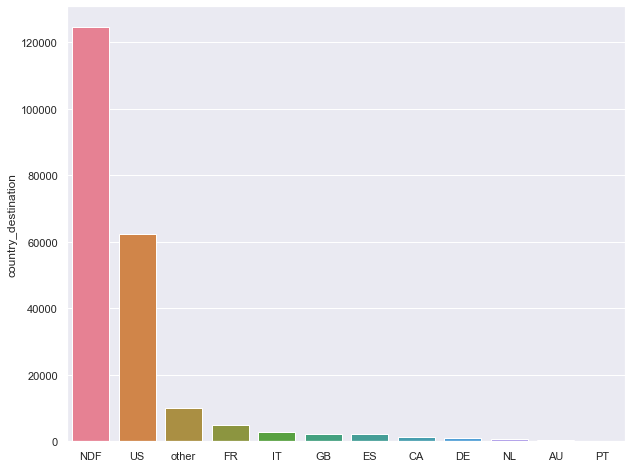

In [41]:
get_distr('country_destination')

**Signup Method**

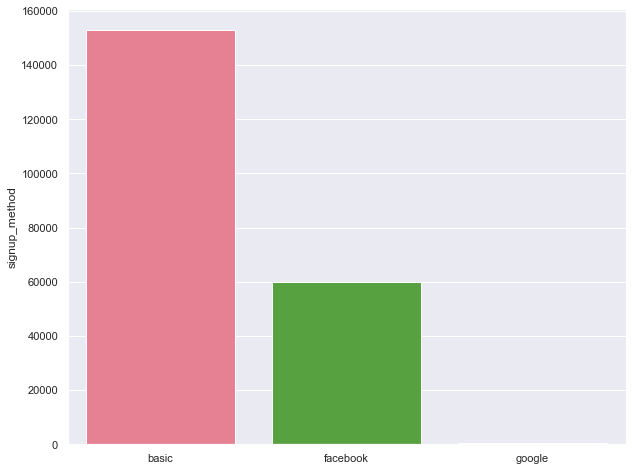

In [42]:
get_distr('signup_method')

**age distribution**

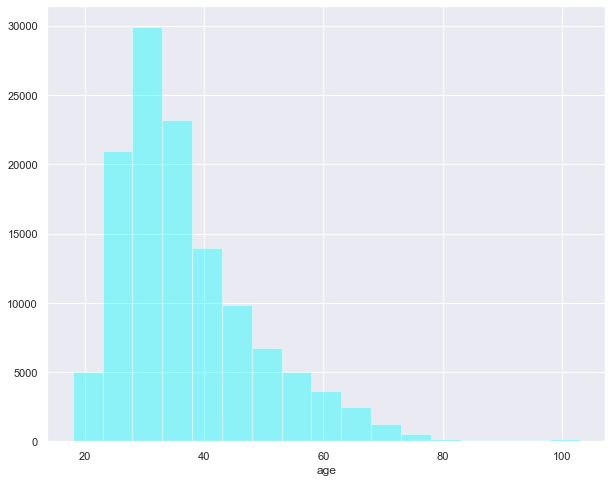

In [43]:
#get_distr('age')
sns.set()
plt.figure(figsize=(10,8))
sns.distplot(train_users['age'],color="cyan",bins=np.arange(18,100+5,5),kde=False)

In [44]:
train_users['age'].describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

**language distribution**

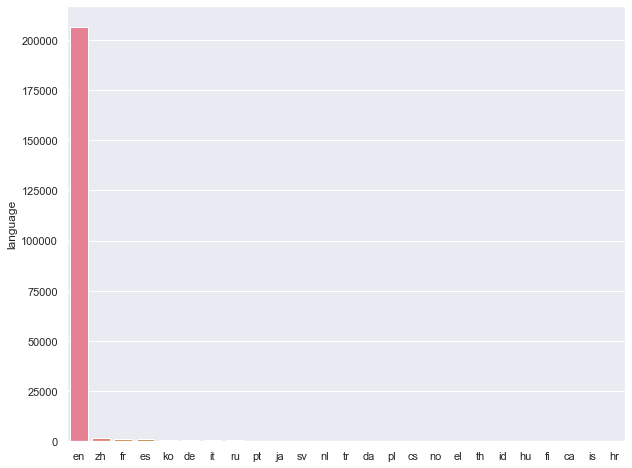

In [45]:
get_distr('language')

**Signup app**

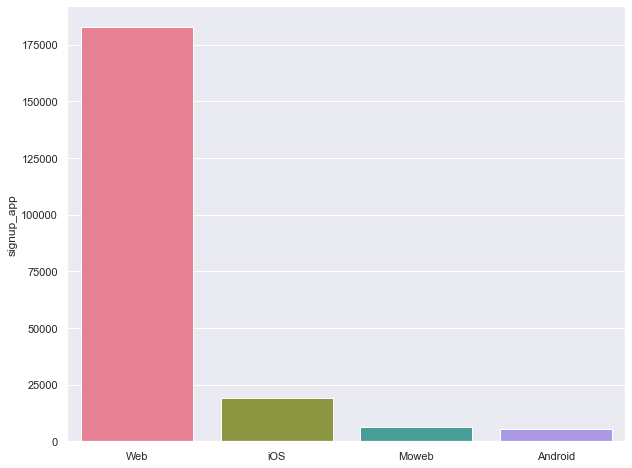

In [46]:
get_distr('signup_app')

**first device type**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

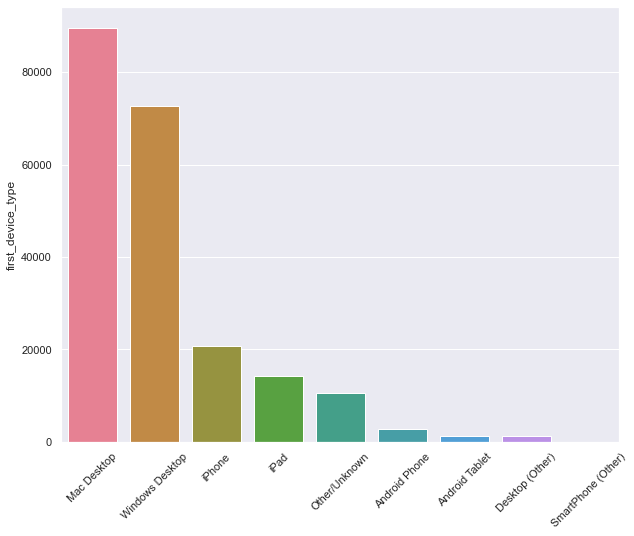

In [47]:
sns.set()
plt.figure(figsize=(10,8))
sns.barplot(train_users['first_device_type'].value_counts().index,train_users['first_device_type'].value_counts(),palette="husl")
plt.xticks(rotation=45)

**When did the customers joined AirBnB?**

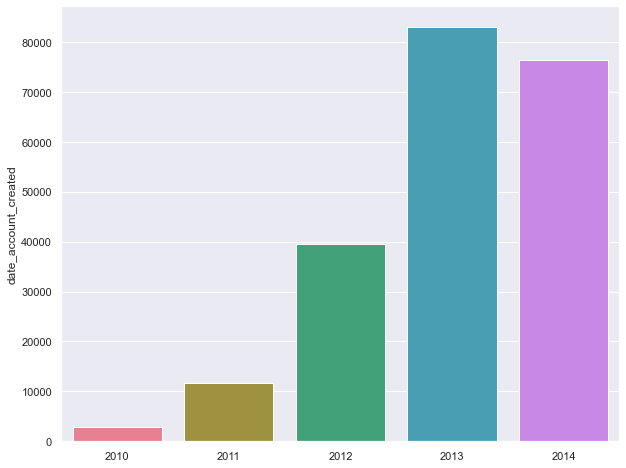

In [48]:
sns.set()
plt.figure(figsize=(10,8))
sns.barplot(train_users['date_account_created'].dt.year.value_counts().index,train_users['date_account_created'].dt.year.value_counts(),palette="husl")

**When did customers do there first booking?**

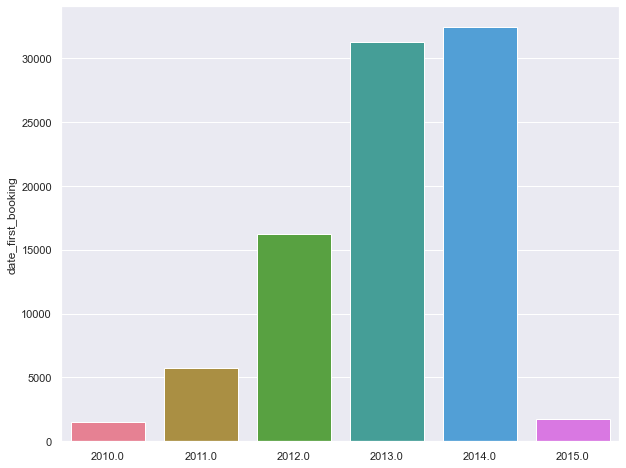

In [49]:
sns.set()
plt.figure(figsize=(10,8))
sns.barplot(train_users['date_first_booking'].dt.year.value_counts().index,train_users['date_first_booking'].dt.year.value_counts(),palette="husl")

### Inference from the data given above

- In terms of gender, females are more active on AirBnB then main. And majority of the users havent specfied their gender
- A major chunk of people just join the website but don't book a destination(NDF). US is the most popular destination followed by other locations, france and italy.
- Majority of our users join via basic then via facebook
- In terms of users, we see high values in the range 20-40 peaking at ~30
- In terms of language major users english, followed by chinese and french
- Majority of the users signed up by Web followed by iOS
- An interesting trend is that major users signed up in 2013 whereas major bookings are done in 2014

# Feature Engineering

**Dealing with test and train data together to get same number of features after one hot encoding**

In [161]:
completedata=pd.concat((train_users.drop(['country_destination'], axis=1), test_users), axis = 0, ignore_index= True)
completedata

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275542,cv0na2lf5a,2014-09-30,2014-09-30 23:52:32,NaT,-unknown-,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE
275543,zp8xfonng8,2014-09-30,2014-09-30 23:53:06,NaT,-unknown-,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-
275544,fa6260ziny,2014-09-30,2014-09-30 23:54:08,NaT,-unknown-,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox
275545,87k0fy4ugm,2014-09-30,2014-09-30 23:54:30,NaT,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari


In [162]:
#Age of 2014 isn't possible and 1 is also not possible so capping the age and converting them to Nan'S
completedata.loc[completedata.age > 95, 'age'] = np.nan
completedata.loc[completedata.age < 15, 'age'] = np.nan

In [163]:
def extract_elements_date(data,feature):
    y=feature+'_year'
    data[y]=data[feature].dt.year
    m=feature+'_month'
    data[m]=data[feature].dt.month
    d=feature+'_date'
    data[d]=data[feature].dt.day
    

In [164]:
#Extracting columns
extract_elements_date(completedata,'date_account_created')
extract_elements_date(completedata,'date_first_booking')
extract_elements_date(completedata,'timestamp_first_active')
completedata['timestamp_first_active_hour']=completedata['timestamp_first_active'].dt.hour

#Dropping columns
completedata=completedata.drop(['id'],axis=1)
completedata=completedata.drop(['date_account_created'],axis=1)
completedata=completedata.drop(['date_first_booking'],axis=1)
completedata=completedata.drop(['timestamp_first_active'],axis=1)

In [165]:
completedata.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,...,date_account_created_year,date_account_created_month,date_account_created_date,date_first_booking_year,date_first_booking_month,date_first_booking_date,timestamp_first_active_year,timestamp_first_active_month,timestamp_first_active_date,timestamp_first_active_hour
0,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,2010,6,28,NaN,NaN,NaN,2009,3,19,4
1,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,...,2011,5,25,NaN,NaN,NaN,2009,5,23,17
2,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,...,2010,9,28,2010.0,8.0,2.0,2009,6,9,23
3,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,2011,12,5,2012.0,9.0,8.0,2009,10,31,6
4,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,...,2010,9,14,2010.0,2.0,18.0,2009,12,8,6


In [166]:
#Making singup flow catgorical
completedata['signup_flow']=completedata['signup_flow'].astype('str')

def create_dummyvariables(data,columname):
    col=pd.get_dummies(data[columname], prefix=columname).iloc[:, 1:] #Taking all columns after the 0th column for k-1 dummy variables
    data=pd.concat([data, col], axis=1)
    data=data.drop([columname],axis=1)
    return data

categorical_features=['gender','signup_method','signup_flow','language','affiliate_channel','affiliate_provider','first_affiliate_tracked','signup_app',
                    'first_device_type','first_browser']

for i in categorical_features:
    completedata=create_dummyvariables(completedata,i)

completedata.head()

,age,date_account_created_year,date_account_created_month,date_account_created_date,date_first_booking_year,date_first_booking_month,date_first_booking_date,timestamp_first_active_year,timestamp_first_active_month,timestamp_first_active_date,...,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_UC Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,NaN,2010,6,28,NaN,NaN,NaN,2009,3,19,...,0,0,0,0,0,0,0,0,0,0
1,38.0,2011,5,25,NaN,NaN,NaN,2009,5,23,...,0,0,0,0,0,0,0,0,0,0
2,56.0,2010,9,28,2010.0,8.0,2.0,2009,6,9,...,0,0,0,0,0,0,0,0,0,0
3,42.0,2011,12,5,2012.0,9.0,8.0,2009,10,31,...,0,0,0,0,0,0,0,0,0,0
4,41.0,2010,9,14,2010.0,2.0,18.0,2009,12,8,...,0,0,0,0,0,0,0,0,0,0


In [167]:
#Finding Null Entries
print("The null values in the dataset are:")
df=pd.DataFrame(np.sum(completedata.isnull(),axis=0))
df[[0]]=(df[[0]]/X.shape[0])*100
df

The null values in the dataset are:


,0
age,56.088751
date_account_created_year,0.000000
date_account_created_month,0.000000
date_account_created_date,0.000000
date_first_booking_year,87.438803
...,...
first_browser_TenFourFox,0.000000
first_browser_TheWorld Browser,0.000000
first_browser_UC Browser,0.000000
first_browser_Yandex.Browser,0.000000


- It can be seen from the above analysis that ~58% of the entries for date first booked are empty, hence, for the time being we will be dropping these values.
- Imputing mean age for NaN

In [168]:
#imputing mean age
completedata['age'].fillna(completedata['age'].mean(),inplace=True)

In [169]:
completedata=completedata.drop(['date_first_booking_year'],axis=1)
completedata=completedata.drop(['date_first_booking_month'],axis=1)
completedata=completedata.drop(['date_first_booking_date'],axis=1)

In [170]:
X=completedata.loc[0:train_users.shape[0]-1,:]
test_df=completedata.loc[train_users.shape[0]:,:]

In [171]:
#getting label for countries
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(train_users['country_destination'])
y.shape

(213451,)

In [172]:
#The number of rows and columns for X
print("The shape of X is {}".format(X.shape))

The shape of X is (213451, 151)


In [173]:
#dividing the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42,stratify=y)

### Evalutation Metric

In [174]:
"""Metrics to compute the model performance."""

import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import make_scorer


def dcg_score(y_true, y_score, k=5):
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])

    gain = 2 ** y_true - 1

    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)


def ndcg_score(ground_truth, predictions, k=5):
    lb = LabelBinarizer()
    lb.fit(range(len(predictions) + 1))
    T = lb.transform(ground_truth)

    scores = []

    # Iterate over each y_true and compute the DCG score
    for y_true, y_score in zip(T, predictions):
        actual = dcg_score(y_true, y_score, k)
        best = dcg_score(y_true, y_true, k)
        score = float(actual) / float(best)
        scores.append(score)

    return np.mean(scores)


ndcg_scorer = make_scorer(ndcg_score, needs_proba=True, k=5)

# Fitting a Baseline Model Random Forest Model

In [151]:
#importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [152]:
rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
print('Accuracy of Test Random Forest Classifier on test set: {:.2f}'.format(rf_clf.score(X_test, y_test)))

Accuracy of Test Random Forest Classifier on test set: 0.60


In [154]:
print("The NDCG Score is {}".format(ndcg_score(y_test,rf_clf.predict_proba(X_test),k=5)))

The NDCG Score is 0.801151262058442


**Understanding the Hyperparameters of Random Forest Classifier**

- n_estimators: The number of decision trees in the random forest model
- max_depth: maximmum depth of each tree. By default -> None which means each node will expand unless every leaf is pure i.e. same class
- min_samples_split: minimum samples required to split an internal leaf node. By default -> 2 meaning we need atleast two samples to split
- min_samples_leaf: minimum number of samples required to be at a leaf node. By default we have 1 implying there should be at least one sample that classifies

In [32]:
#Using GridSearch CV
param_grid={'n_estimators': range(100,110)}

rf_cv = GridSearchCV(rf_clf, param_grid, cv=5, verbose=0,n_jobs=4,scoring='accuracy')
best_model=rf_cv.fit(X_train,y_train.values.ravel())

print("Using Grid Search CV")
print("tuned hpyerparameters :(best parameters) ",best_model.best_params_)
print("accuracy :",best_model.best_score_)

Using Grid Search CV
tuned hpyerparameters :(best parameters)  {'n_estimators': 103}
accuracy : 0.6009302948164508


In [255]:
rf_clf = RandomForestClassifier(n_estimators=103)

rf_clf.fit(X_train, y_train.values.ravel())

y_pred = rf_clf.predict(X_test)
print('Accuracy of Test Random Forest Classifier on test set: {:.2f}'.format(rf_clf.score(X_test, y_test.values.ravel())))
print("The NDCG Score is {}".format(ndcg_score(y_test.to_numpy(),rf_clf.predict_proba(X_test),k=5)))

Accuracy of Test Random Forest Classifier on test set: 0.60
The NDCG Score is 0.7974843864018611


In [31]:
rf_clf = RandomForestClassifier(n_estimators=500)

rf_clf.fit(X_train, y_train.values.ravel())

y_pred = rf_clf.predict(X_test)
print('Accuracy of Test Random Forest Classifier on test set: {:.2f}'.format(rf_clf.score(X_test, y_test.values.ravel())))
print("The NDCG Score is {}".format(ndcg_score(y_test.to_numpy(),rf_clf.predict_proba(X_test),k=5)))

Accuracy of Test Random Forest Classifier on test set: 0.60
The NDCG Score is 0.8026203473476192


In [266]:
#get randomized search

def func(param_grid):
    rf_random = RandomizedSearchCV(rf_clf, param_distributions = param_grid, n_iter = 1, cv = 3, n_jobs = -1)
    best_model=rf_random.fit(X_train,y_train.values.ravel())

    print("Using Grid Search CV")
    print("tuned hpyerparameters :(best parameters) ",best_model.best_params_)
    print("accuracy :",best_model.best_score_)
    
    return best_model

import multiprocessing as mp
pool = mp.Pool(4)
param_grid={'n_estimators': np.arange(100,900,100)}
results = pool.map(func,param_grid)

### Preparing the Dataset for testing and getting the submission results

In [180]:
ytest_pred=rf_clf.predict(test_df)

In [181]:
ytest_pred=pd.DataFrame(ytest_pred,columns=['country_destination'])

In [185]:
ytest_pred=le.inverse_transform(ytest_pred)

In [187]:
idx=test_users['id']
submission=pd.DataFrame(idx,columns=['id'])
submission['country']=ytest_pred
submission=submission.set_index('id')
submission1=submission.to_csv('output1.csv')
submission

,country
id,
5uwns89zht,US
jtl0dijy2j,NDF
xx0ulgorjt,US
6c6puo6ix0,US
czqhjk3yfe,US
...,...
cv0na2lf5a,US
zp8xfonng8,NDF
fa6260ziny,NDF


**Challenges Faced**

- New Evaluation Metric: Understand why its used
- Creating dummy variables one-hot encoding vs integer mapping
- Understanding hyperparamaters of all the models used and how to vary them